In [ ]:
from google.colab import files, drive
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_dir = "/content/drive/My Drive/CS464_project/processed_images"
os.listdir(root_dir)

['test', 'val', 'train']

In [ ]:
original_train_path = os.path.join(root_dir,"train","original")
original_val_path = os.path.join(root_dir,"val")
original_test_path = os.path.join(root_dir,"test")
aug_train_path = os.path.join(root_dir,"train","augmented")

In [ ]:
classes = {'normal': 0, 'tumor': 1}

In [ ]:
# Original Training Set
x_train = []
y_train = []
is_gray_scale = True # RGB ÇÖP --> grayscale ile daha kısa zamanda aynı accuracy alınabiliyor!!
for cls in classes:
    train_pth = os.path.join(original_train_path, cls)
    for j in os.listdir(train_pth):
        image_path = os.path.join(train_pth,j)
        img = cv2.imread(image_path)
        #print(img.shape)
        if is_gray_scale:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            #print('after greyscale: ', img.shape)
            img = img.reshape(224,224,1)
            #img = img.reshape((50176))
        else:
            img = img.reshape((50176*3))
        x_train.append(img)
        y_train.append(classes[cls])

    train_pth = os.path.join(aug_train_path, cls)
    for j in os.listdir(train_pth):
        image_path = os.path.join(train_pth,j)
        img = cv2.imread(image_path)
        if is_gray_scale:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = img.reshape((50176))
        else:
            img = img.reshape((50176*3))
        x_train.append(img)
        y_train.append(classes[cls])

In [ ]:
x_train = []
y_train = []
is_gray_scale = True # RGB ÇÖP --> grayscale ile daha kısa zamanda aynı accuracy alınabiliyor!!
for cls in classes:
  train_pth = os.path.join(original_train_path, cls)
  for j in os.listdir(train_pth):
    image_path = os.path.join(train_pth,j)
    img = cv2.imread(image_path)
    #print(img.shape)
    if is_gray_scale:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      #print('after greyscale: ', img.shape)
      img = img.reshape(224,224,1)
      #img = img.reshape((50176))
    else:
      img = img.reshape((50176*3))
    x_train.append(img)
    y_train.append(classes[cls])

In [ ]:
# Original Validation Set
x_val = []
y_val = []
is_gray_scale = True
for cls in classes:
  val_pth = os.path.join(original_val_path, cls)
  for j in os.listdir(val_pth):
    image_path = os.path.join(val_pth,j)
    img = cv2.imread(image_path)
    if is_gray_scale:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      #img = img.reshape((50176))
      img = img.reshape(224,224,1)
    else:
      img = img.reshape((50176*3))
    x_val.append(img)
    y_val.append(classes[cls])

In [ ]:
x_test = []
y_test = []
is_gray_scale = True
for cls in classes:
  test_pth = os.path.join(original_test_path, cls)
  for j in os.listdir(test_pth):
    image_path = os.path.join(test_pth,j)
    img = cv2.imread(image_path)
    if is_gray_scale:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      #img = img.reshape((50176))
      img = img.reshape(224,224,1)
    else:
      img = img.reshape((50176*3))
    x_test.append(img)
    y_test.append(classes[cls])

In [ ]:
x_train = np.array(x_train)

In [ ]:
y_train = np.array(y_train)

In [ ]:
x_val = np.array(x_val)
y_val = np.array(y_val)

In [ ]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_train.shape, y_train.shape

((767, 224, 224, 1), (767,))

In [ ]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

cnn_model.compile(optimizer = tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
24/24 [==============================] - 1s 34ms/step - loss: 210.9137 - accuracy: 0.5593 - val_loss: 0.6432 - val_accuracy: 0.5030
Epoch 2/30
24/24 [==============================] - 1s 26ms/step - loss: 0.7084 - accuracy: 0.5684 - val_loss: 0.5711 - val_accuracy: 0.7030
Epoch 3/30
24/24 [==============================] - 1s 26ms/step - loss: 0.8272 - accuracy: 0.7027 - val_loss: 0.4985 - val_accuracy: 0.7152
Epoch 4/30
24/24 [==============================] - 1s 26ms/step - loss: 0.4302 - accuracy: 0.7992 - val_loss: 0.4493 - val_accuracy: 0.8061
Epoch 5/30
24/24 [==============================] - 1s 26ms/step - loss: 0.3713 - accuracy: 0.8840 - val_loss: 0.3889 - val_accuracy: 0.8909
Epoch 6/30
24/24 [==============================] - 1s 27ms/step - loss: 0.3229 - accuracy: 0.9218 - val_loss: 0.3341 - val_accuracy: 0.9091
Epoch 7/30
24/24 [==============================] - 1s 27ms/step - loss: 0.2962 - accuracy: 0.9635 - val_loss: 0.3228 - val_accuracy: 0.9697
Epoch 8/30


In [ ]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 93312)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

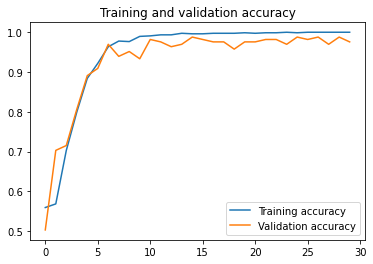

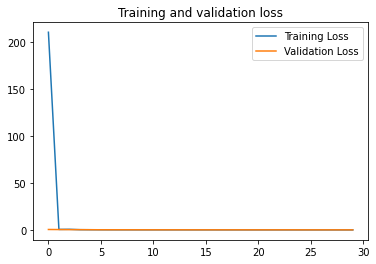

In [ ]:
import matplotlib.pyplot as plt
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, label='Training accuracy')
  plt.plot(epochs, val_acc, label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, label='Training Loss')
  plt.plot(epochs, val_loss, label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

plot_loss_acc(history)

In [ ]:
predict = cnn_model.predict(x_test)

6/6 [==============================] - 0s 9ms/step


In [ ]:
y_pred = np.round(predict)

In [ ]:
cnn_model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 9ms/step - loss: 0.1727 - accuracy: 1.0000


[0.1727096140384674, 1.0]

F1-Score and More

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, fbeta_score, ConfusionMatrixDisplay

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00       104

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



In [ ]:
accuracy_score(y_test, y_pred)

1.0

Confusion Matrix

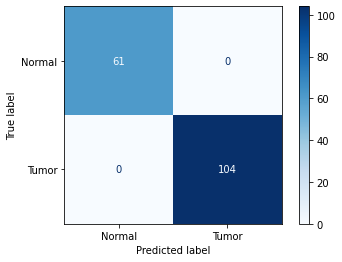

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Normal', 'Tumor'])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()